In [2]:
from sklearn.datasets import load_iris
import pandas as pd

In [3]:
iris = load_iris()
x = iris.data
y = iris.target

In [4]:
datas = pd.DataFrame(x, columns=iris.feature_names)

In [5]:
datas.drop(['petal width (cm)', 'petal length (cm)'], inplace=True, axis=1)

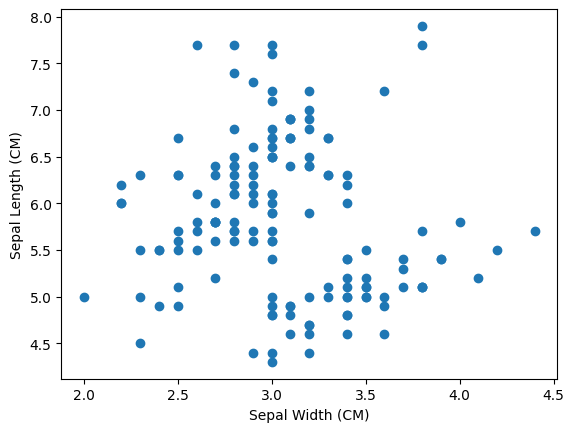

In [9]:
import matplotlib.pyplot as plt
plt.clf()
# plt.plot(datas, y)
plt.scatter(datas['sepal width (cm)'], datas['sepal length (cm)'])
plt.xlabel("Sepal Width (CM)")
plt.ylabel("Sepal Length (CM)")
plt.show()

In [10]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
trainData, testData, trainTarget, testTarget = train_test_split(datas, y, test_size=0.2, random_state=66)
model = NearestNeighbors(n_neighbors=3)
model.fit(trainData, trainTarget)

NearestNeighbors(n_neighbors=3)

In [12]:
distance, index = model.kneighbors()

In [18]:
import numpy as np
meanDistance = np.mean(distance, axis=1)
meanDistance

array([0.12761424, 0.14120227, 0.11380712, 0.10786893, 0.23548317,
       0.06666667, 0.11380712, 0.1745356 , 0.06666667, 0.06666667,
       0.13333333, 0.08047379, 0.12761424, 0.03333333, 0.08047379,
       0.11380712, 0.41231056, 0.24120227, 0.18047379, 0.03333333,
       0.06666667, 0.1688165 , 0.03333333, 0.11380712, 0.11380712,
       0.64885852, 0.25522847, 0.34037009, 0.1       , 0.32018504,
       0.12761424, 0.06666667, 0.11380712, 0.11380712, 0.23548317,
       0.32018504, 0.11380712, 0.08047379, 0.1       , 0.11380712,
       0.1       , 0.1       , 0.06666667, 0.06666667, 0.52616698,
       0.14714045, 0.03333333, 0.17207592, 0.08047379, 0.12761424,
       0.13333333, 0.11380712, 0.08047379, 0.11380712, 0.19621165,
       0.1       , 0.1       , 0.11380712, 0.3001299 , 0.12761424,
       0.11380712, 0.1688165 , 0.2236068 , 0.16666667, 0.18047379,
       0.13333333, 0.11380712, 0.06666667, 0.03333333, 0.24120227,
       0.39493973, 0.21573787, 0.03333333, 0.1       , 0.17453

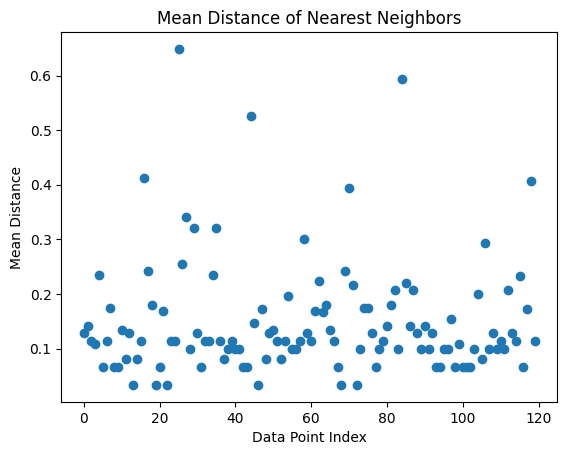

In [20]:
# 使用matplotlib.pyplot 画图观测每个点的k 距离平均值
plt.scatter(range(len(meanDistance)), meanDistance)
plt.xlabel('Data Point Index')
plt.ylabel('Mean Distance')
plt.title('Mean Distance of Nearest Neighbors')
plt.show()

In [24]:
outPoint = np.where(meanDistance > 0.15)[0]
outPointValue = meanDistance[outPoint]
outPoint

array([  4,   7,  16,  17,  18,  21,  25,  26,  27,  29,  34,  35,  44,
        47,  54,  58,  61,  62,  63,  64,  69,  70,  71,  74,  75,  81,
        82,  84,  85,  87,  97, 104, 106, 112, 115, 117, 118])

In [25]:
outPointValue

array([0.23548317, 0.1745356 , 0.41231056, 0.24120227, 0.18047379,
       0.1688165 , 0.64885852, 0.25522847, 0.34037009, 0.32018504,
       0.23548317, 0.32018504, 0.52616698, 0.17207592, 0.19621165,
       0.3001299 , 0.1688165 , 0.2236068 , 0.16666667, 0.18047379,
       0.24120227, 0.39493973, 0.21573787, 0.1745356 , 0.1745356 ,
       0.18047379, 0.20786893, 0.59367499, 0.21921637, 0.20786893,
       0.15500938, 0.2       , 0.29397106, 0.20786893, 0.23333333,
       0.17207592, 0.40740417])

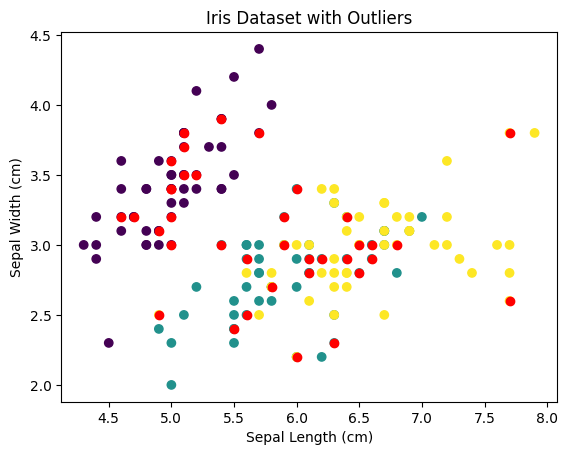

In [27]:
plt.scatter(datas['sepal length (cm)'], datas['sepal width (cm)'], c=y, cmap='viridis')
plt.scatter(datas.iloc[outPoint]['sepal length (cm)'], datas.iloc[outPoint]['sepal width (cm)'], c='red')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset with Outliers')
plt.show()